In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Cleaned_data.csv').set_index('Unnamed: 0')
data.index = np.arange(len(data))

In [3]:
state_columns = ['Env1', 'Env2', 'Env3', 'Env4', 'Env5', 'Env6', 'Env7', '현재값']
action_column = ['Agent']

In [54]:
state = data[state_columns]
from sklearn.preprocessing import StandardScaler
scaler.fit(state)
state = scaler.transform(state)

In [56]:
state = data[state_columns]
action = data[action_column].iloc[:-1]
next_state = state.loc[1:]
state = state.iloc[:-1]

In [57]:
stack_size = 10

In [59]:
stacked_state = []
for i in range(len(state) - stack_size):
    current_state =  state.iloc[i : i + stack_size].values
    stacked_state.append(current_state)
    # print(np.shape(stacked_state))

In [60]:
state_np = np.array(stacked_state)

In [63]:
x_0 = state_np.copy()
x_1 = action.iloc[stack_size - 1 : -1].values
y = next_state.iloc[stack_size -1 : -1].values

In [64]:
train_x_0 = x_0[:-1000]
train_x_1 = x_1[:-1000]
train_y = y[:-1000]

test_x_0 = x_0[-1000:]
test_x_1 = x_1[-1000:]
test_y = y[-1000:]

In [65]:
def create_lstm_model():
    state_input = tf.keras.layers.Input(shape = (stack_size, 8))
    action_input = tf.keras.layers.Input(shape = (action.shape[1],))
    rnn_layer = tf.keras.layers.LSTM(16)(state_input)
    concat_layer = tf.keras.layers.Concatenate()([action_input, rnn_layer])
    layer = tf.keras.layers.Dense(units = 64, activation = 'relu')(concat_layer)
    layer = tf.keras.layers.Dense(units = 64, activation = 'relu')(layer)
    output = tf.keras.layers.Dense(units = 8)(layer)
    return tf.keras.Model(inputs = [state_input, action_input], outputs = output)

In [66]:
lstm_model = create_lstm_model()

In [67]:
lstm_model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

In [68]:
lstm_model.fit(x= [train_x_0, train_x_1], y = train_y, batch_size = 64, epochs = 10)

Epoch 1/10
6330/6330 [==============================] - 15s 2ms/step - loss: 0.1427 - accuracy: 0.8465
Epoch 2/10
6330/6330 [==============================] - 15s 2ms/step - loss: 0.0488 - accuracy: 0.8936
Epoch 3/10
6330/6330 [==============================] - 15s 2ms/step - loss: 0.0360 - accuracy: 0.8980
Epoch 4/10
6330/6330 [==============================] - 15s 2ms/step - loss: 0.0346 - accuracy: 0.9013
Epoch 5/10
6330/6330 [==============================] - 15s 2ms/step - loss: 0.0318 - accuracy: 0.9026
Epoch 6/10
6330/6330 [==============================] - 15s 2ms/step - loss: 0.0305 - accuracy: 0.9043
Epoch 7/10
6330/6330 [==============================] - 15s 2ms/step - loss: 0.0303 - accuracy: 0.9057
Epoch 8/10
6330/6330 [==============================] - 14s 2ms/step - loss: 0.0296 - accuracy: 0.9065
Epoch 9/10
6330/6330 [==============================] - 14s 2ms/step - loss: 0.0282 - accuracy: 0.9071
Epoch 10/10
6330/6330 [==============================] - 15s 2ms/step - l

In [ ]:
output = lstm_model.predict([test_x_0, test_x_1])
splited_ouput  =np.split(output, 8, axis = 1)

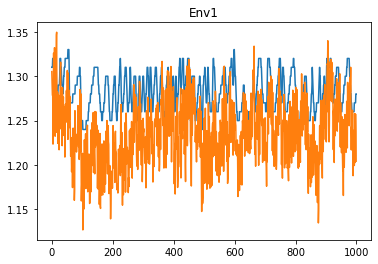

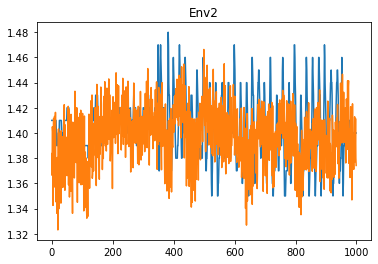

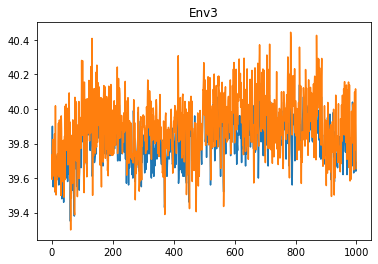

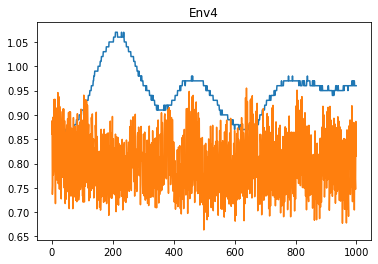

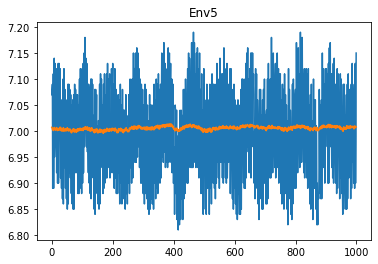

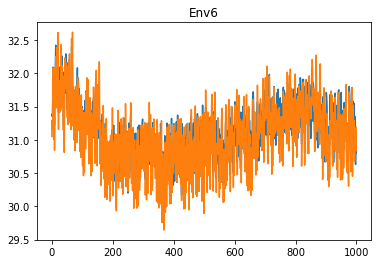

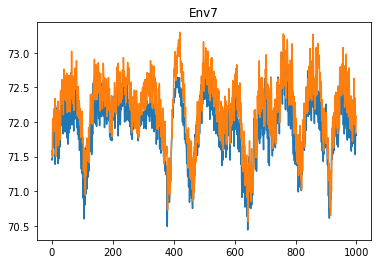

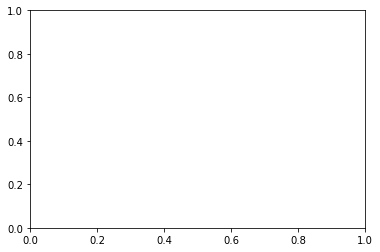

In [52]:
for i in range(7):
    plt.plot(test_y[:, i])
    plt.plot(splited_ouput[i])
    plt.title(state_columns[i])
    plt.show()
    plt.cla()

In [109]:
lstm_model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 4, 8)]       0                                            
__________________________________________________________________________________________________
input_16 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
lstm_4 (LSTM)                   (None, 4)            208         input_15[0][0]                   
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (None, 5)            0           input_16[0][0]                   
                                                                 lstm_4[0][0]          